In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = np.load("proyecto_training_data.npy")
b = int(len(data)*0.8)
print(data.shape)

data_train = data[0:b]
data_validate = data[b:len(data)]


#variable1
for i in range(0,6,1) :
    media= np.nanmean(data_train[:,i])
    valor_max=np.nanmax(data_train[:,i])
    valor_min=np.nanmin(data_train[:,i])
    ptp= np.ptp(data_train[:,i], axis=0)
    desv= np.nanstd(data_train[:,i])
    print("Variable:",i)
    print("media:",media,"maximo:",valor_max,"minimo:",valor_min,"desviacion est:",desv,"peak to peak:",ptp)






(1460, 6)
Variable: 0
media: 180590.27739726027 maximo: 755000.0 minimo: 34900.0 desviacion est: 78781.95108033362 peak to peak: 720100.0
Variable: 1
media: 6.101027397260274 maximo: 10.0 minimo: 1.0 desviacion est: 1.377435193240741 peak to peak: 9.0
Variable: 2
media: 1156.3236301369864 maximo: 3228.0 minimo: 334.0 desviacion est: 373.620331503586 peak to peak: 2894.0
Variable: 3
media: 6.4854452054794525 maximo: 14.0 minimo: 2.0 desviacion est: 1.6084517167387253 peak to peak: 12.0
Variable: 4
media: 1971.451198630137 maximo: 2010.0 minimo: 1875.0 desviacion est: 29.93888206867768 peak to peak: 135.0
Variable: 5
media: 69.94698544698545 maximo: 313.0 minimo: 21.0 desviacion est: 23.4659548199304 peak to peak: nan


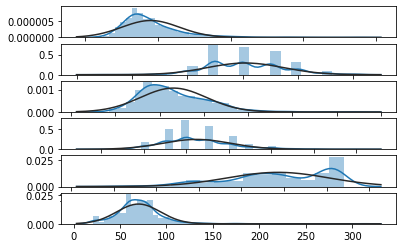

In [2]:
from scipy import stats
from scipy.stats import norm

fig,axs = plt.subplots(nrows=6)
for i in range(6):
    
    sns.distplot(data_train[:,i], fit=norm, kde=True, ax=axs[i])    
    


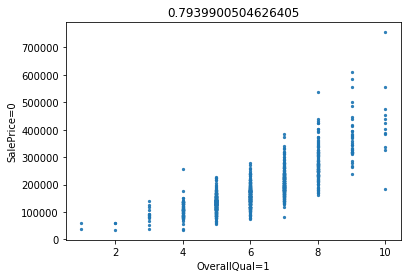

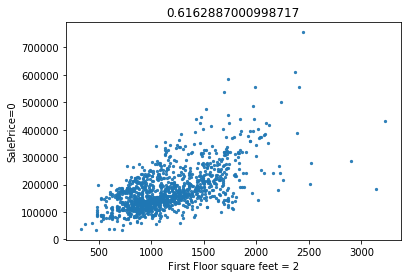

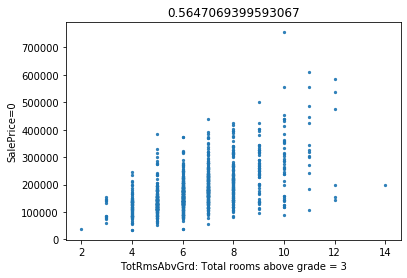

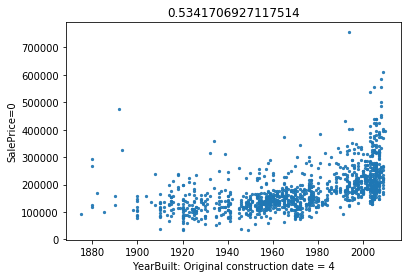

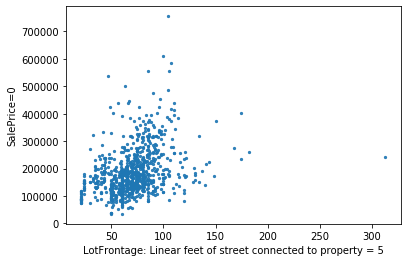

In [330]:
nombres_var = np.array(["SalePrice=0","OverallQual=1","First Floor square feet = 2","TotRmsAbvGrd: Total rooms above grade = 3","YearBuilt: Original construction date = 4","LotFrontage: Linear feet of street connected to property = 5"])

for t in range(1,6,1):
    coef = np.ma.corrcoef(data_train[:,t], data_train[:,0])
    plt.scatter(data_train[:,t], data_train[:,0],s=5,alpha=0.9)
    plt.xlabel(nombres_var[t])
    plt.ylabel(nombres_var[0])
    plt.title(coef[0,1])
    plt.show()

In [3]:
def r_lineal(x,y,epochs,lr,error_cada):
    #print(x)
    #print(y)
    f_x = np.ones((len(x),2))
    f_x[:, 0] =  x    
    v_mb = np.zeros_like(f_x)    
    yhat = np.zeros(len(x))
    errores =  np.array(np.empty(shape=(0,2), dtype=float))
    modelo =  np.array(np.empty(shape=(0,2), dtype=float))
    acum_error = 1
    pos_error = 0
    
    
    for o in range (0,epochs,1):
        
                
        for i in range(0,len(x),1):
            yhat[i] = np.dot(f_x[i,0],v_mb[i,0]) + np.dot(f_x[i,1],v_mb[i,1])
        g_m = np.nanmean((yhat-y)*x)
        g_b = np.nanmean((yhat-y))
        if(acum_error == error_cada):
            error =  np.array((int(o+1),(0.5*np.nanmean(np.power((y-yhat),2)))))
            errores= np.insert(errores,pos_error, error, axis = 0)
            pos_error +=1
            acum_error = 1
        elif(o==0):
            error =  np.array((int(o+1),(0.5*np.nanmean(np.power((y-yhat),2)))))
            errores= np.insert(errores,pos_error, error, axis = 0)
            pos_error +=1
            acum_error +=1          
        
        else:
            acum_error += 1
            
            
        v_mb[:, 0] = v_mb[:, 0] - (lr*g_m)
        v_mb[:, 1] = v_mb[:, 1] - (lr*g_b)        
        cal_modelo =  np.array((v_mb[1, 0],v_mb[1, 1]))
        modelo= np.insert(modelo,int(o), cal_modelo, axis = 0)
        #print("Iteracion:",o+1,g_m)
        #print("Iteracion:",o+1,g_b)
        
    
    
    
    #print(f_x[:,0])
    #print(v_mb[:,0])
    #print(f_x[:,1])
    #print(v_mb[:,1])        
    return modelo,errores  

In [49]:
#IMPORTANTE: Dejo siempre la primera iteracion siempre ya que es donde mas se nota de la primera a la segunda epoca el cambio

def imprimir_modelo(resultado,ite):
    modelo = resultado[0]  
    
    #print(modelo)
    p_x = x
    #print(p_x)
    #print(modelo[1,0])
    p_y = (np.dot(modelo[0,0],p_x)) +  modelo[1,1]
    
    #print(error_y)
    #print(error_x)

    plt.plot(x,p_y)
    plt.scatter(x, y,s=5,alpha=0.9)
    plt.xlabel('x')
    plt.ylabel('y * 1000')
    plt.title(1)
    plt.show()
    for i in range(ite-1,epochs,ite):
        
        p_y = (np.dot(modelo[i,0],p_x)) +  modelo[i,1]
    
        #print(error_y)
        #print(error_x)

        plt.plot(x,p_y)
        plt.scatter(x, y/1000,s=5,alpha=0.9)
        plt.xlabel('x')
        plt.ylabel('y * 1000')
        plt.title(i+1)
        plt.show()
    return ""

def imprimir_error(resultado):
    modelo = resultado[0]
    error = resultado[1]
    #print(modelo)
    #print(error)
    error_x = error[:,1]
    error_y = error[:,0]
    error_y = error_y.astype(int)
    #print(error_y)
    #print(error_x)

    plt.plot(error_y, error_x)
    plt.xlabel('Iteraciones')
    plt.ylabel('Error')
    plt.title('Losses')
    plt.show()
    return ""


In [149]:

def predecir_datos(resultado,x_predecir,y_a_predecir):
    modelo = resultado[0]
    #print(modelo[len(resultado[0])-1,0])
    #print(modelo[len(resultado[0])-1,1])
    
    p_y = ((np.dot(modelo[len(resultado[0])-1,0],x_predecir)) +  modelo[len(resultado[0])-1,1])*1000
    tf = pd.DataFrame({'Actual': y_a_predecir, 'Predicted': p_y})
    tf
    return tf   

    


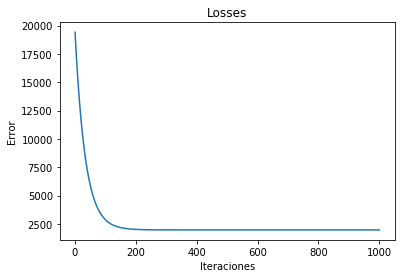

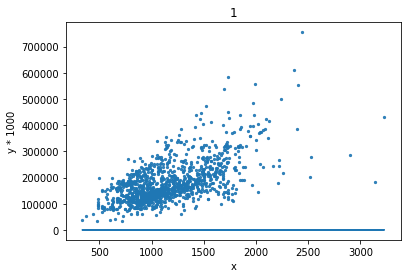

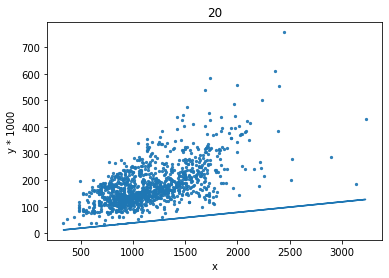

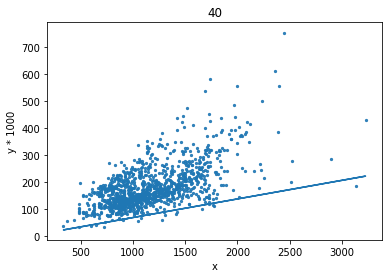

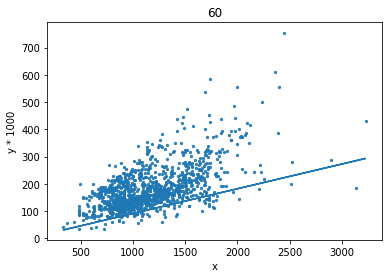

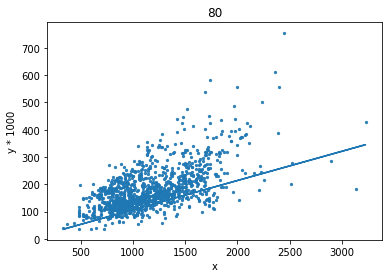

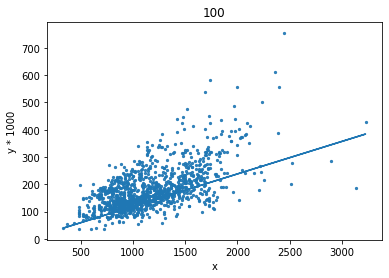

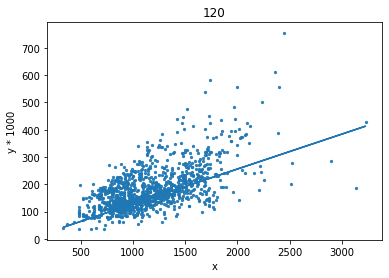

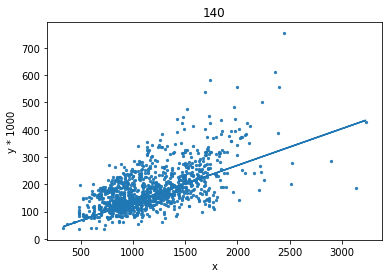

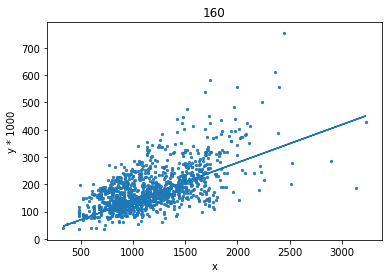

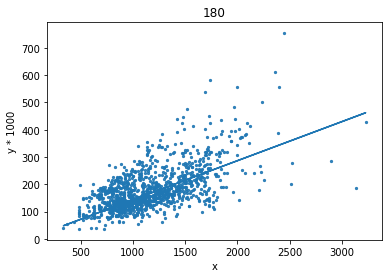

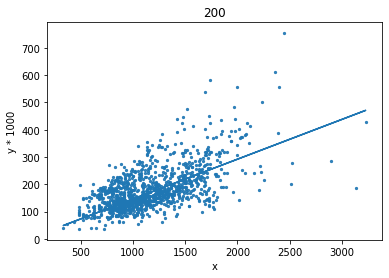

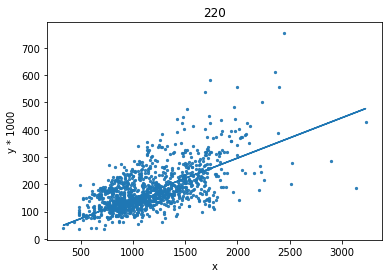

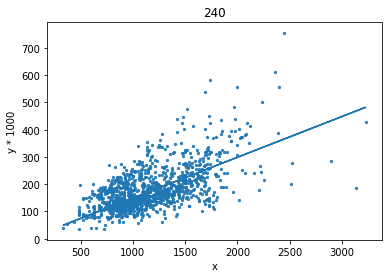

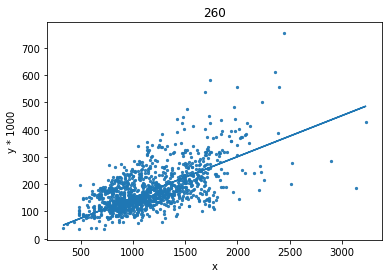

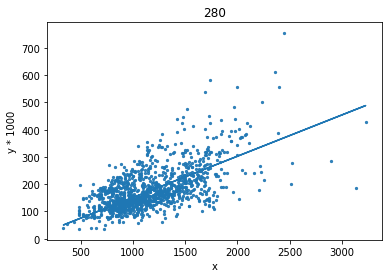

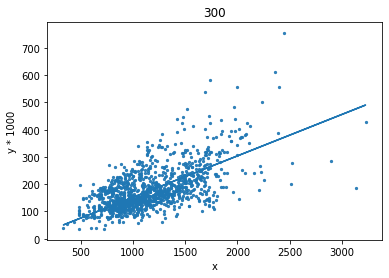

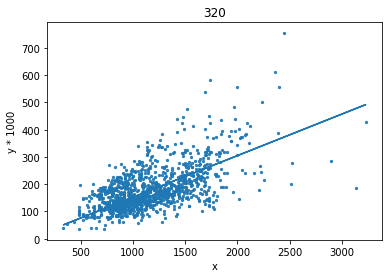

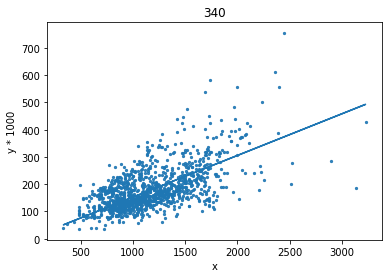

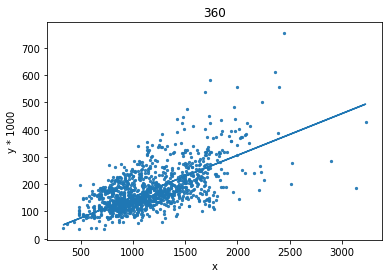

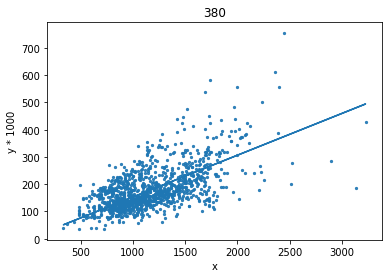

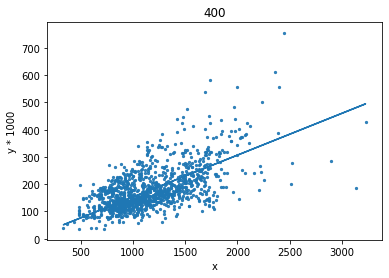

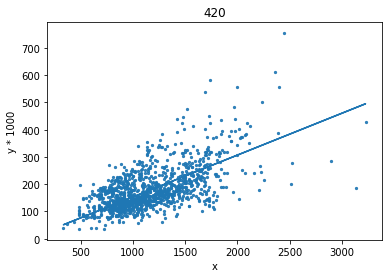

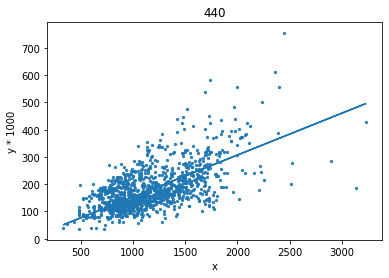

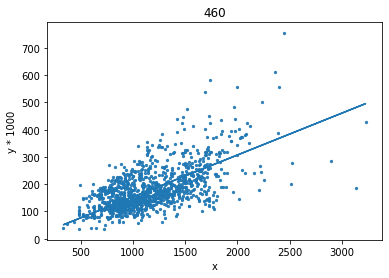

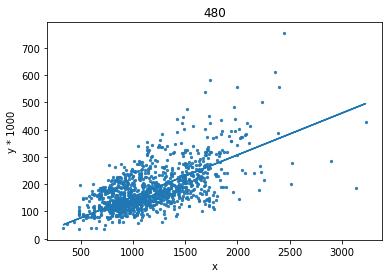

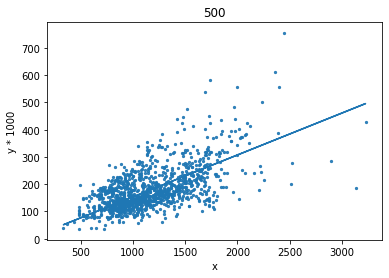

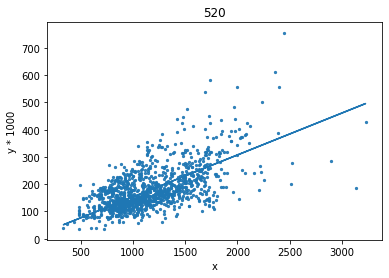

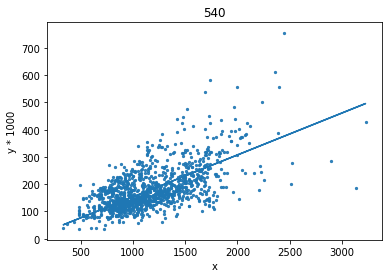

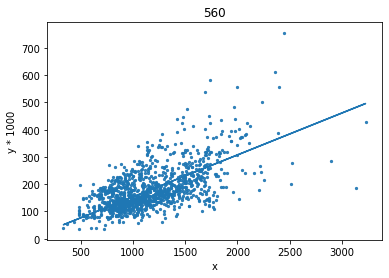

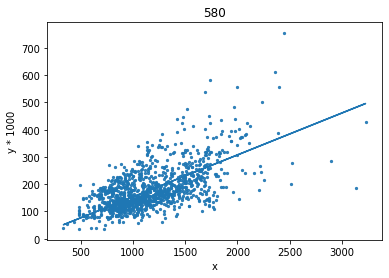

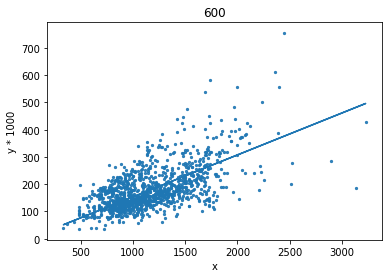

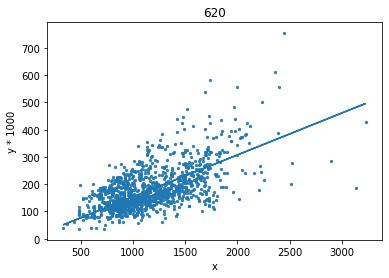

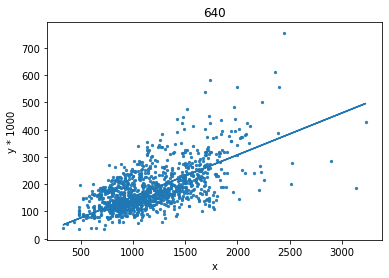

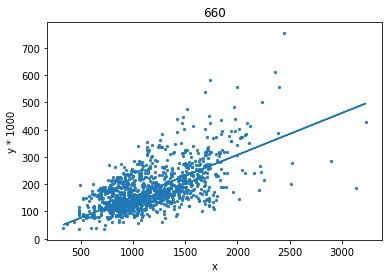

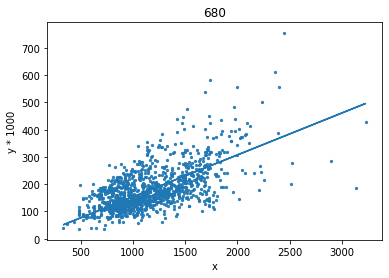

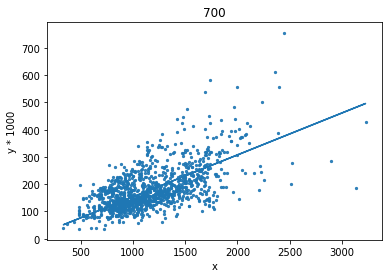

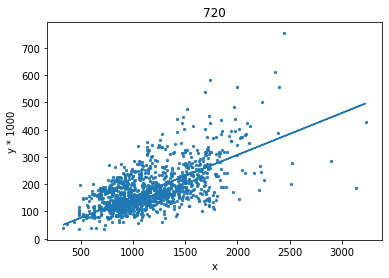

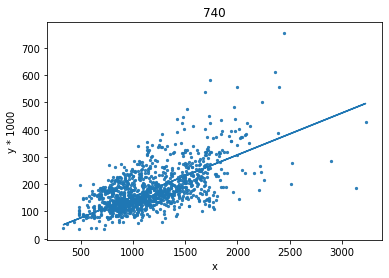

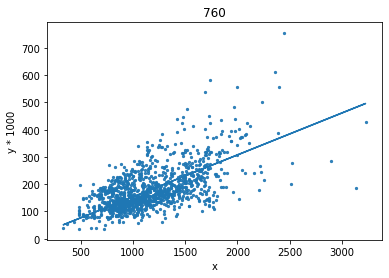

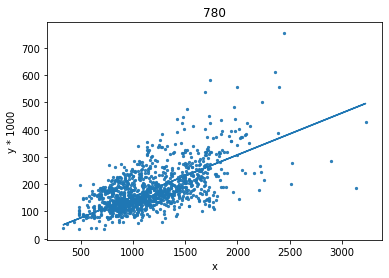

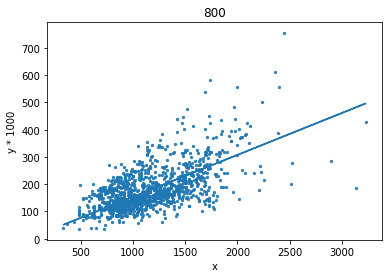

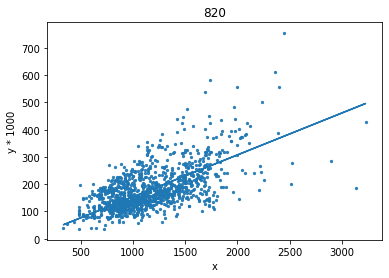

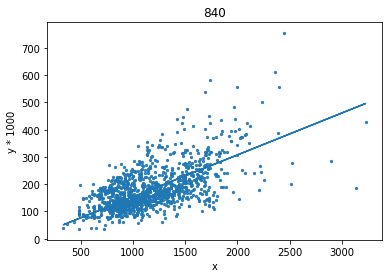

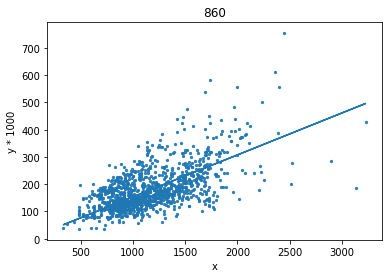

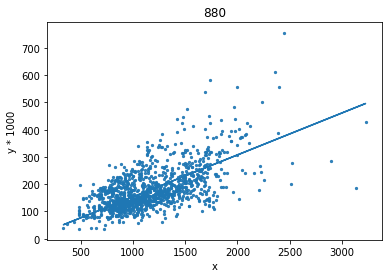

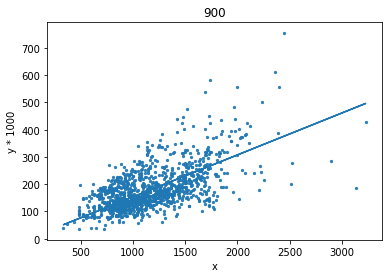

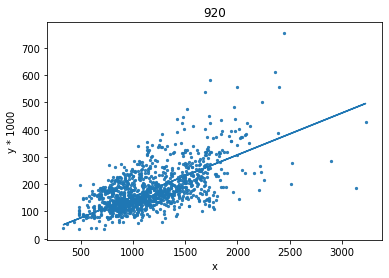

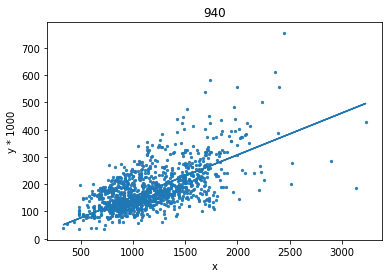

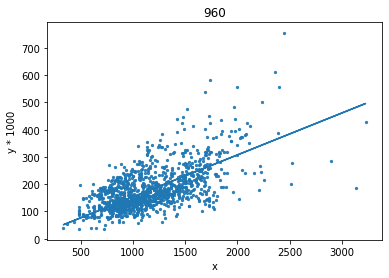

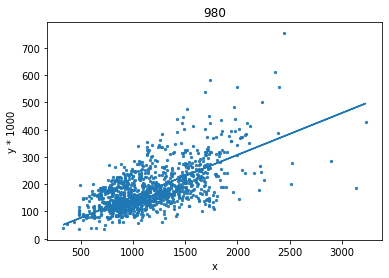

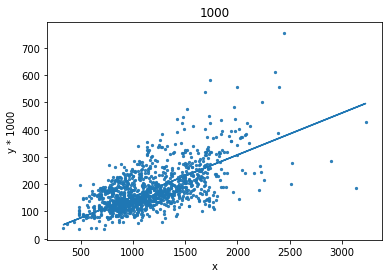


       Actual      Predicted
0    235000.0  189969.627353
1    625000.0  281419.335775
2    171000.0  171833.382658
3    163000.0  193812.052077
4    171900.0   96060.767109
..        ...            ...
287  175000.0  146473.379483
288  210000.0  318614.007099
289  266500.0  182592.171884
290  142125.0  165685.503100
291  147500.0  193043.567132

[292 rows x 2 columns]


,Actual,Predicted
0,235000.0,190944.320642
1,625000.0,268265.309803
2,171000.0,175610.074052
3,163000.0,194193.101699
4,171900.0,111544.111604
...,...,...
287,175000.0,154168.119075
288,210000.0,299713.510436
289,266500.0,184706.661012
290,142125.0,170412.024361


In [160]:

x = data_train[:,2]
y = data_train[:,0]
epochs = 1000
lr = 0.00000001
error_cada = 1
resultado = r_lineal(x,y/1000,epochs,lr,error_cada)
#print(resultado)
print(imprimir_error(resultado))
print(imprimir_modelo(resultado,20))
    
x_predecir = data_validate[:,2]
y_a_predecir = data_validate[:,0]
print(predecir_datos(resultado,x_predecir,y_a_predecir))


from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x.reshape(-1,1), y)
y_pred = regressor.predict(x_predecir.reshape(-1,1))
df = pd.DataFrame({'Actual': y_a_predecir,'Predicted': y_pred})
df